# Import Library

In [1]:
!pip install sastrawi
!pip install googletrans==3.1.0a0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 951.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=576e597a3aa3855458713039f1fb07fd9573c7327985e042daccc9623abbc9c4
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting 

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import csv
import requests
from io import StringIO
import joblib
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from googletrans import Translator

# NLTK Downloads:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Acquisition

In [3]:
df = pd.read_csv('ulasan_capcut.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c0398d79-bb36-4483-b14e-e8344753aaeb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus banget,5,0,NaN,2024-07-03 02:23:58,NaN,NaN,NaN
1,b1b1d8a9-05b3-40aa-b0b2-b7c24e6ea21f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bisa ngedit,5,0,NaN,2024-07-03 02:23:47,NaN,NaN,NaN
2,71ece7cb-b17a-4cba-a11b-0fbcd48bc19a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagusss,5,0,NaN,2024-07-03 02:23:18,NaN,NaN,NaN
3,c5d1a863-1f3d-4223-942b-fb8e040b8c2e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bismillah,5,0,12.0.0,2024-07-03 02:18:50,NaN,NaN,12.0.0
4,b9089923-83a1-4564-a1d4-de09157a88c1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sekarang ribet bngt cih, kudu nonton dlu iklan",1,0,12.0.0,2024-07-03 02:18:31,NaN,NaN,12.0.0


In [4]:
# fokus ke atribut content saja
app_reviews_df = df[['content']]
app_reviews_df.head()

,content
0,Bagus banget
1,Bisa ngedit
2,Bagusss
3,Bismillah
4,"sekarang ribet bngt cih, kudu nonton dlu iklan"


# Data Preprocessing

## Case Folding

In [5]:
loc_text = 9991

In [6]:
def casefoldingText(text):
    text = text.lower()
    return text

In [7]:
text = app_reviews_df['content'].loc[loc_text]
print(f'Teks asli: {text}')

text = casefoldingText(text)
print(f'Casefolding: {text}')

Teks asli: Saya sangat suka aplikasi ini karena saya suka menggedit
Casefolding: saya sangat suka aplikasi ini karena saya suka menggedit


## Normalisasi

In [8]:
def normalisasi_teks(teks):
  # Kamus kata yang akan diganti
    kamus_normalisasi = {
        "jj": "jedagjedug",
        "jedag": "jedagjedug",
        "jedug": "jedagjedug",
        "apk": "aplikasi",
        "apknya": 'aplikasi',
        "bug": "rusak"
    }

    # Pisahkan teks menjadi daftar kata-kata
    kata_kata = teks.lower().split()

    # Normalisasi kata-kata sesuai dengan kamus
    kata_kata_normal = [kamus_normalisasi.get(kata, kata) for kata in kata_kata]

    # Gabungkan kembali daftar kata menjadi teks
    teks_normal = ' '.join(kata_kata_normal)

    return teks_normal

In [9]:
text = app_reviews_df['content'].loc[loc_text]
print(f'Teks asli: {text}')

text = casefoldingText(text)
print(f'Casefolding: {text}')

text = normalisasi_teks(text)
print(f'Normalisasi: {text}')

Teks asli: Saya sangat suka aplikasi ini karena saya suka menggedit
Casefolding: saya sangat suka aplikasi ini karena saya suka menggedit
Normalisasi: saya sangat suka aplikasi ini karena saya suka menggedit


## Translate to English

In [10]:
translator = Translator()

def convert_eng(review):
    result = translator.translate(review)
    return result.text

In [11]:
text = app_reviews_df['content'].loc[loc_text]
print(f'Teks asli: {text}')

text = casefoldingText(text)
print(f'Casefolding: {text}')

text = normalisasi_teks(text)
print(f'Normalisasi: {text}')

text = convert_eng(text)
print(f'Translate to English: {text}')

Teks asli: Saya sangat suka aplikasi ini karena saya suka menggedit
Casefolding: saya sangat suka aplikasi ini karena saya suka menggedit
Normalisasi: saya sangat suka aplikasi ini karena saya suka menggedit
Translate to English: I really like this application because I like editing


## Clean Text

In [12]:
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^a-z]', ' ', text) # Menghapus karakter selain huruf

    text = re.sub(r'\s+', ' ', text).strip()  # Menghapus multiple spasi dan trim

    return text

In [13]:
text = app_reviews_df['content'].loc[loc_text]
print(f'Teks asli: {text}')

text = casefoldingText(text)
print(f'Casefolding: {text}')

text = normalisasi_teks(text)
print(f'Normalisasi: {text}')

text = convert_eng(text)
print(f'Translate to English: {text}')

text = cleanText(text)
print(f'Clean Text: {text}')

Teks asli: Saya sangat suka aplikasi ini karena saya suka menggedit
Casefolding: saya sangat suka aplikasi ini karena saya suka menggedit
Normalisasi: saya sangat suka aplikasi ini karena saya suka menggedit
Translate to English: I really like this application because I like editing
Clean Text: really like this application because like editing


## Translate to Indonesian

In [14]:
# translate to indonesian
def translate_to_indonesian(text):
    translator = Translator()
    result = translator.translate(text, dest='id')
    result.text = result.text.lower()
    return result.text

In [15]:
text = app_reviews_df['content'].loc[loc_text]
print(f'Teks asli: {text}')

text = casefoldingText(text)
print(f'Casefolding: {text}')

text = normalisasi_teks(text)
print(f'Normalisasi: {text}')

text = convert_eng(text)
print(f'Translate to English: {text}')

text = cleanText(text)
print(f'Clean Text: {text}')

text = translate_to_indonesian(text)
print(f'Translate to Indonesian: {text}')

Teks asli: Saya sangat suka aplikasi ini karena saya suka menggedit
Casefolding: saya sangat suka aplikasi ini karena saya suka menggedit
Normalisasi: saya sangat suka aplikasi ini karena saya suka menggedit
Translate to English: I really like this application because I like editing
Clean Text: really like this application because like editing
Translate to Indonesian: sangat menyukai aplikasi ini karena suka mengedit


## Stopword Removal Indonesia

In [16]:
def stopword_removal_id(text):
    stopwords_set = set(stopwords.words('indonesian')) # Define stopwords_set here
    stopwords_set.discard('lama')  # Mengecualikan kata 'lama' dari stopwords
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stopwords_set]
    return ' '.join(filtered_words)

In [17]:
text = app_reviews_df['content'].loc[loc_text]
print(f'Teks asli: {text}')

text = casefoldingText(text)
print(f'Casefolding: {text}')

text = normalisasi_teks(text)
print(f'Normalisasi: {text}')

text = convert_eng(text)
print(f'Translate to English: {text}')

text = cleanText(text)
print(f'Clean Text: {text}')

text = translate_to_indonesian(text)
print(f'Translate to Indonesian: {text}')

text = stopword_removal_id(text)
print(f'Stopword Removal: {text}')

Teks asli: Saya sangat suka aplikasi ini karena saya suka menggedit
Casefolding: saya sangat suka aplikasi ini karena saya suka menggedit
Normalisasi: saya sangat suka aplikasi ini karena saya suka menggedit
Translate to English: I really like this application because I like editing
Clean Text: really like this application because like editing
Translate to Indonesian: sangat menyukai aplikasi ini karena suka mengedit
Stopword Removal: menyukai aplikasi suka mengedit


## Stemming

In [18]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    stemmed_text = stemmer.stem(text)

    return stemmed_text

In [19]:
text = app_reviews_df['content'].loc[loc_text]
print(f'Teks asli: {text}')

text = casefoldingText(text)
print(f'Casefolding: {text}')

text = normalisasi_teks(text)
print(f'Normalisasi: {text}')

text = convert_eng(text)
print(f'Translate to English: {text}')

text = cleanText(text)
print(f'Clean Text: {text}')

text = translate_to_indonesian(text)
print(f'Translate to Indonesian: {text}')

text = stopword_removal_id(text)
print(f'Stopword Removal: {text}')

text = stemmingText(text)
print(f'Stemming: {text}')

Teks asli: Saya sangat suka aplikasi ini karena saya suka menggedit
Casefolding: saya sangat suka aplikasi ini karena saya suka menggedit
Normalisasi: saya sangat suka aplikasi ini karena saya suka menggedit
Translate to English: I really like this application because I like editing
Clean Text: really like this application because like editing
Translate to Indonesian: sangat menyukai aplikasi ini karena suka mengedit
Stopword Removal: menyukai aplikasi suka mengedit
Stemming: suka aplikasi suka edit


## Hapus Kata Duplikat

In [20]:
def remove_duplicate_words(sentence):
    words = sentence.split()
    unique_words = []
    seen_words = set()

    for word in words:
        if word not in seen_words:
            unique_words.append(word)
            seen_words.add(word)

    return ' '.join(unique_words)

In [21]:
text = app_reviews_df['content'].loc[loc_text]
print(f'Teks asli: {text}')

text = normalisasi_teks(text)
print(f'Normalisasi: {text}')

text = convert_eng(text)
print(f'Translate to English: {text}')

text = casefoldingText(text)
print(f'Casefolding: {text}')

text = cleanText(text)
print(f'Clean Text: {text}')

text = translate_to_indonesian(text)
print(f'Translate to Indonesian: {text}')

text = stopword_removal_id(text)
print(f'Stopword Removal: {text}')

text = stemmingText(text)
print(f'Stemming: {text}')

text = remove_duplicate_words(text)
print(f'Remove Duplicate Words: {text}')

Teks asli: Saya sangat suka aplikasi ini karena saya suka menggedit
Normalisasi: saya sangat suka aplikasi ini karena saya suka menggedit
Translate to English: I really like this application because I like editing
Casefolding: i really like this application because i like editing
Clean Text: i really like this application because i like editing
Translate to Indonesian: saya sangat menyukai aplikasi ini karena saya suka mengedit
Stopword Removal: menyukai aplikasi suka mengedit
Stemming: suka aplikasi suka edit
Remove Duplicate Words: suka aplikasi edit


## Apply all to Dataframe

In [62]:
# Iterate over each row in the DataFrame and apply the functions
df_clean = app_reviews_df.copy()  # Create a copy to avoid modifying the original
df_clean['normalisasi'] = df_clean['content'].apply(normalisasi_teks)
df_clean['english'] = df_clean['normalisasi'].apply(convert_eng)
df_clean['casefolding'] = df_clean['english'].apply(casefoldingText)
df_clean['clean'] = df_clean['casefolding'].apply(cleanText)
df_clean['indonesian'] = df_clean['clean'].apply(translate_to_indonesian)
df_clean['clean'] = df_clean['indonesian'].apply(cleanText)
df_clean['stopword'] = df_clean['clean'].apply(stopword_removal_id)
df_clean['stemming'] = df_clean['stopword'].apply(stemmingText)
df_clean['ready'] = df_clean['stemming'].apply(remove_duplicate_words)

In [63]:
df_clean

,content,normalisasi,english,casefolding,clean,lemma
0,Bagus banget,bagus banget,really good,really good,really good,really good
1,Bisa ngedit,bisa ngedit,can edit,can edit,can edit,can edit
2,Bagusss,bagusss,nice,nice,nice,nice
3,Bismillah,bismillah,Bismillah,bismillah,bismillah,bismillah
4,"sekarang ribet bngt cih, kudu nonton dlu iklan","sekarang ribet bngt cih, kudu nonton dlu iklan","Now it's really complicated, you have to watch...","now it's really complicated, you have to watch...",now it s really complicated you have to watch ...,now it s really complicated you have to watch ...
...,...,...,...,...,...,...
9995,tidak bisa di unduh,tidak bisa di unduh,can't be downloaded,can't be downloaded,can t be downloaded,can t be downloaded
9996,Capcut ini sangat berguna sekali,capcut ini sangat berguna sekali,This capcut is very useful,this capcut is very useful,this capcut is very useful,this capcut is very useful
9997,Bgus,bgus,great,great,great,great
9998,Aku kasih bintang 4 ya soalnya masih ada yang ...,aku kasih bintang 4 ya soalnya masih ada yang ...,I'm giving it 4 stars because there's still so...,i'm giving it 4 stars because there's still so...,i m giving it stars because there s still some...,i m giving it star because there s still somet...


In [64]:
df_clean.to_csv('df_clean.csv', index=False)

In [22]:
df_clean = pd.read_csv('df_clean.csv')

In [23]:
df_clean

,Unnamed: 0,content,normalisasi,english,casefolding,clean,clean.1,indonesian,stopword,stemming,ready
0,0,Bagus banget,bagus banget,really good,really good,sangat bagus,really good,sangat bagus,bagus,bagus,bagus
1,1,Bisa ngedit,bisa ngedit,can edit,can edit,dapat mengedit,can edit,dapat mengedit,mengedit,edit,edit
2,2,Bagusss,bagusss,nice,nice,bagus,nice,bagus,bagus,bagus,bagus
3,3,Bismillah,bismillah,Bismillah,bismillah,bismillah,bismillah,bismillah,bismillah,bismillah,bismillah
4,4,"sekarang ribet bngt cih, kudu nonton dlu iklan","sekarang ribet bngt cih, kudu nonton dlu iklan","Now it's really complicated, you have to watch...","now it's really complicated, you have to watch...",nah ribet banget harus nonton iklannya dulu,now it s really complicated you have to watch ...,nah ribet banget harus nonton iklannya dulu,ribet banget nonton iklannya,ribet banget nonton iklan,ribet banget nonton iklan
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,tidak bisa di unduh,tidak bisa di unduh,can't be downloaded,can't be downloaded,tidak dapat diunduh,can t be downloaded,tidak dapat diunduh,diunduh,unduh,unduh
9996,9996,Capcut ini sangat berguna sekali,capcut ini sangat berguna sekali,This capcut is very useful,this capcut is very useful,capcut ini sangat bermanfaat,this capcut is very useful,capcut ini sangat bermanfaat,capcut bermanfaat,capcut manfaat,capcut manfaat
9997,9997,Bgus,bgus,great,great,besar,great,besar,NaN,NaN,NaN
9998,9998,Aku kasih bintang 4 ya soalnya masih ada yang ...,aku kasih bintang 4 ya soalnya masih ada yang ...,I'm giving it 4 stars because there's still so...,i'm giving it 4 stars because there's still so...,aku kasih bintang soalnya masih ada yang kuran...,i m giving it stars because there s still some...,aku kasih bintang soalnya masih ada yang kuran...,kasih bintang tolong tambahkan karakter suaran...,kasih bintang tolong tambah karakter suara bia...,kasih bintang tolong tambah karakter suara bia...


## Handling Missing Value & Duplicate

In [24]:
df_clean.isna().sum()

Unnamed: 0       0
content          0
normalisasi      0
english          0
casefolding      0
clean          241
clean.1        241
indonesian     241
stopword       469
stemming       469
ready          469
dtype: int64

In [25]:
df_clean.duplicated().sum()

0

In [26]:
df_clean = df_clean.dropna()
df_clean = df_clean.drop_duplicates()

In [27]:
# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = df_clean.shape

print("Jumlah Baris:", jumlah_ulasan)
print("Jumlah Kolom:", jumlah_kolom)

Jumlah Baris: 9531
Jumlah Kolom: 11


# Pelabelan

In [28]:
df = df_clean.copy()
df.head()

,Unnamed: 0,content,normalisasi,english,casefolding,clean,clean.1,indonesian,stopword,stemming,ready
0,0,Bagus banget,bagus banget,really good,really good,sangat bagus,really good,sangat bagus,bagus,bagus,bagus
1,1,Bisa ngedit,bisa ngedit,can edit,can edit,dapat mengedit,can edit,dapat mengedit,mengedit,edit,edit
2,2,Bagusss,bagusss,nice,nice,bagus,nice,bagus,bagus,bagus,bagus
3,3,Bismillah,bismillah,Bismillah,bismillah,bismillah,bismillah,bismillah,bismillah,bismillah,bismillah
4,4,"sekarang ribet bngt cih, kudu nonton dlu iklan","sekarang ribet bngt cih, kudu nonton dlu iklan","Now it's really complicated, you have to watch...","now it's really complicated, you have to watch...",nah ribet banget harus nonton iklannya dulu,now it s really complicated you have to watch ...,nah ribet banget harus nonton iklannya dulu,ribet banget nonton iklannya,ribet banget nonton iklan,ribet banget nonton iklan


## Load Positive Lexicon

In [29]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

In [30]:
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [31]:
# Lexicon tambahan
additional_lexicon = {
    'positif': {
        'keren': 4,
        'aplikasi': 4,
        'jedagjedug': 2,
    },
    'negatif': {
        'iklan': -4,
        'sulit': -3,
        'rusak': -7,
        'pro': -2
    }
}

# Menggabungkan lexicon tambahan ke lexicon asli
lexicon_positive.update(additional_lexicon['positif'])
lexicon_negative.update(additional_lexicon['negatif'])

In [33]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    # Inisialisasi skor sentimen ke 0

    # Iterasi setiap kata dalam teks
    for word in text.split():
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]

    # Menentukan polaritas berdasarkan skor sentimen
    if score > 0:
        polarity = 'positive'
    elif score == 0:
        polarity = 'netral'
    else:
        polarity = 'negative'

    return score, polarity

In [34]:
results = df['ready'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
positive    6958
negative    1632
netral       941
Name: count, dtype: int64


In [35]:
df.head()

,Unnamed: 0,content,normalisasi,english,casefolding,clean,clean.1,indonesian,stopword,stemming,ready,polarity_score,polarity
0,0,Bagus banget,bagus banget,really good,really good,sangat bagus,really good,sangat bagus,bagus,bagus,bagus,2,positive
1,1,Bisa ngedit,bisa ngedit,can edit,can edit,dapat mengedit,can edit,dapat mengedit,mengedit,edit,edit,0,netral
2,2,Bagusss,bagusss,nice,nice,bagus,nice,bagus,bagus,bagus,bagus,2,positive
3,3,Bismillah,bismillah,Bismillah,bismillah,bismillah,bismillah,bismillah,bismillah,bismillah,bismillah,4,positive
4,4,"sekarang ribet bngt cih, kudu nonton dlu iklan","sekarang ribet bngt cih, kudu nonton dlu iklan","Now it's really complicated, you have to watch...","now it's really complicated, you have to watch...",nah ribet banget harus nonton iklannya dulu,now it s really complicated you have to watch ...,nah ribet banget harus nonton iklannya dulu,ribet banget nonton iklannya,ribet banget nonton iklan,ribet banget nonton iklan,-7,negative


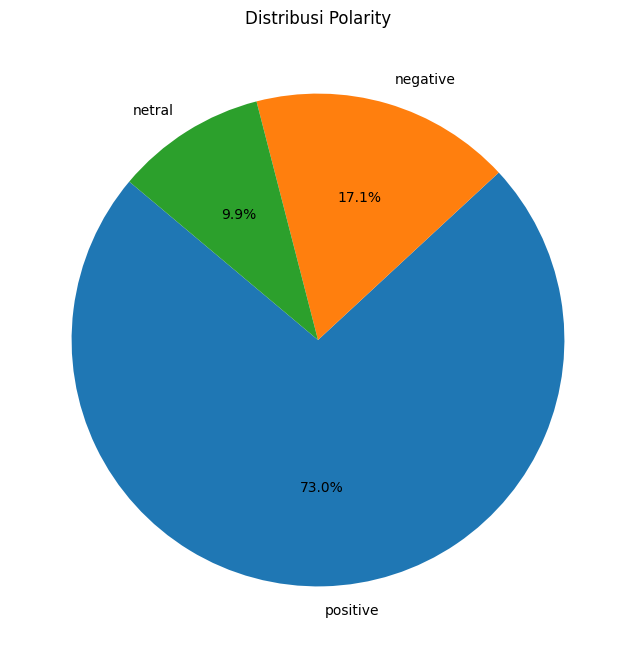

In [36]:
# Menghitung nilai unik dan jumlahnya dalam kolom 'polarity'
polarity_counts = df['polarity'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Polarity')
plt.show()

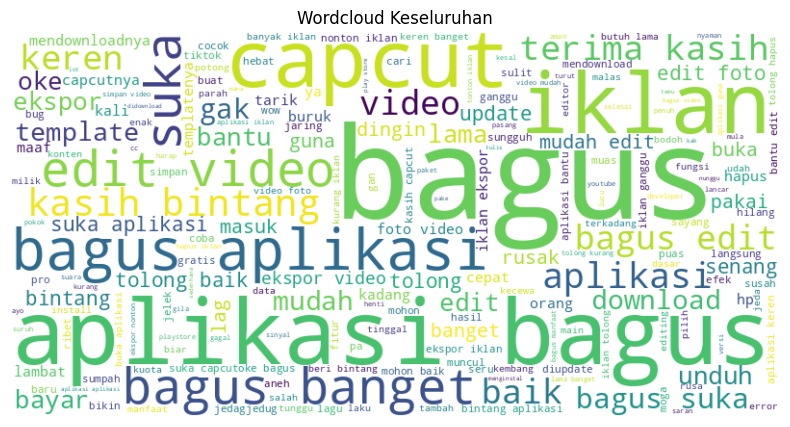

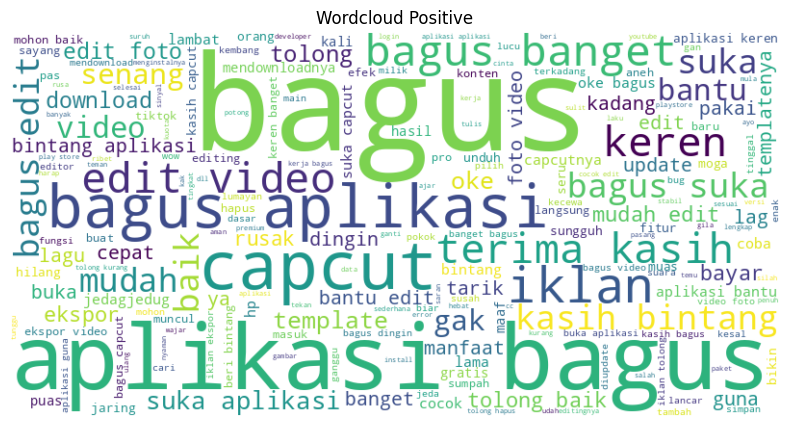

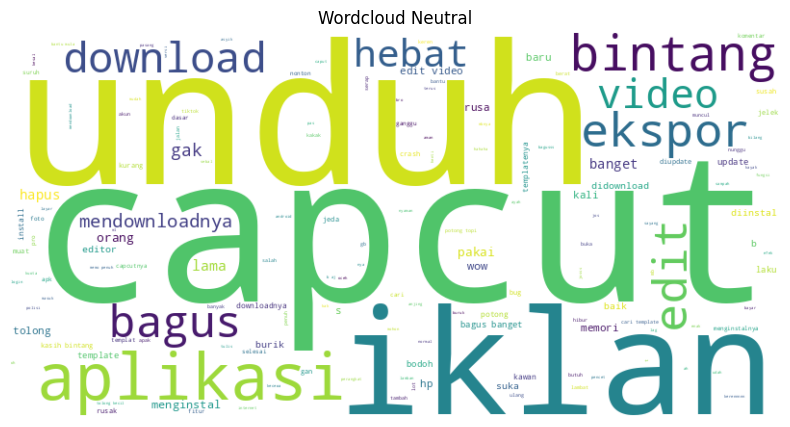

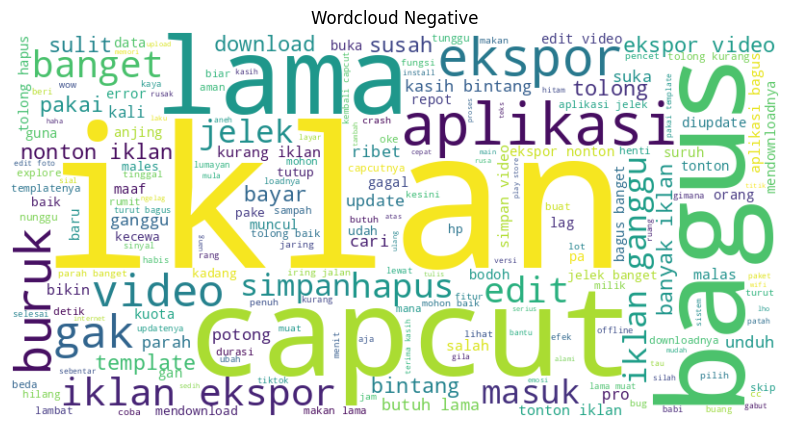

In [37]:
# Menggabungkan semua teks untuk keseluruhan wordcloud
all_text = ' '.join(df['ready'])

# Menggabungkan teks untuk wordcloud positif
positive_text = ' '.join(df[df['polarity'] == 'positive']['ready'])

# Menggabungkan teks untuk wordcloud netral
neutral_text = ' '.join(df[df['polarity'] == 'netral']['ready'])

# Menggabungkan teks untuk wordcloud negatif
negative_text = ' '.join(df[df['polarity'] == 'negative']['ready'])

# Membuat wordcloud untuk keseluruhan teks
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Membuat wordcloud untuk teks positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Membuat wordcloud untuk teks netral
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Membuat wordcloud untuk teks negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Menampilkan wordcloud keseluruhan
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Keseluruhan')
plt.show()
print()

# Menampilkan wordcloud positif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Positive')
plt.show()
print()

# Menampilkan wordcloud netral
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Neutral')
plt.show()
print()

# Menampilkan wordcloud negatif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Negative')
plt.show()
print()

# Split Data

In [38]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = df['ready']
y = df['polarity']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ekstraksi Fitur

## TF-IDF

In [39]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,aja,ajar,aman,aneh,aplikasi,ayo,bagus,baik,banget,bantu,...,ubah,udah,ulang,unduh,update,versi,video,wow,ya,youtube
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.504161,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7619,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7620,0.0,0.0,0.0,0.0,0.143546,0.0,0.000000,0.0,0.0,0.247304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.195708,0.0,0.0,0.0
7621,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7622,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## CV

In [40]:
# Ekstraksi fitur dengan CountVectorizer
count_vectorizer = CountVectorizer(max_features=200, min_df=17, max_df=0.8)
X_train_cv = count_vectorizer.fit_transform(X_train)
X_test_cv = count_vectorizer.transform(X_test)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_train_cv.toarray(), columns=count_vectorizer.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,aja,ajar,aman,aneh,aplikasi,ayo,bagus,baik,banget,bantu,...,ubah,udah,ulang,unduh,update,versi,video,wow,ya,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7619,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7620,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling

## Logistic Regression

### TF-IDF

In [41]:
# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan TF-IDF
logistic_regression.fit(X_train_tfidf.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji TF-IDF
y_pred_train_lr_tfidf = logistic_regression.predict(X_train_tfidf.toarray())
y_pred_test_lr_tfidf = logistic_regression.predict(X_test_tfidf.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan TF-IDF
accuracy_train_lr_tfidf = accuracy_score(y_pred_train_lr_tfidf, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji TF-IDF
accuracy_test_lr_tfidf = accuracy_score(y_pred_test_lr_tfidf, y_test)

# Menampilkan akurasi TF-IDF
print('Logistic Regression (TF-IDF) - accuracy_train:', accuracy_train_lr_tfidf)
print('Logistic Regression (TF-IDF) - accuracy_test:', accuracy_test_lr_tfidf)

Logistic Regression (TF-IDF) - accuracy_train: 0.9184155299055614
Logistic Regression (TF-IDF) - accuracy_test: 0.9145254326166754


### CV

In [42]:
# Membuat objek model Logistic Regression untuk CountVectorizer
logistic_regression_cv = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan CountVectorizer
logistic_regression_cv.fit(X_train_cv.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji CountVectorizer
y_pred_train_lr_cv = logistic_regression_cv.predict(X_train_cv.toarray())
y_pred_test_lr_cv = logistic_regression_cv.predict(X_test_cv.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan CountVectorizer
accuracy_train_lr_cv = accuracy_score(y_pred_train_lr_cv, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji CountVectorizer
accuracy_test_lr_cv = accuracy_score(y_pred_test_lr_cv, y_test)

# Menampilkan akurasi CountVectorizer
print('Logistic Regression (CountVectorizer) - accuracy_train:', accuracy_train_lr_cv)
print('Logistic Regression (CountVectorizer) - accuracy_test:', accuracy_test_lr_cv)

Logistic Regression (CountVectorizer) - accuracy_train: 0.9161857292759706
Logistic Regression (CountVectorizer) - accuracy_test: 0.9119035133717881


## Naive Bayes

### TF-IDF

In [43]:
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes_tfidf = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan TF-IDF
naive_bayes_tfidf.fit(X_train_tfidf.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji TF-IDF
y_pred_train_nb_tfidf = naive_bayes_tfidf.predict(X_train_tfidf.toarray())
y_pred_test_nb_tfidf = naive_bayes_tfidf.predict(X_test_tfidf.toarray())

# Evaluasi akurasi model Naive Bayes pada data pelatihan TF-IDF
accuracy_train_nb_tfidf = accuracy_score(y_pred_train_nb_tfidf, y_train)

# Evaluasi akurasi model Naive Bayes pada data uji TF-IDF
accuracy_test_nb_tfidf = accuracy_score(y_pred_test_nb_tfidf, y_test)

# Menampilkan akurasi TF-IDF
print('Naive Bayes (TF-IDF) - accuracy_train:', accuracy_train_nb_tfidf)
print('Naive Bayes (TF-IDF) - accuracy_test:', accuracy_test_nb_tfidf)

Naive Bayes (TF-IDF) - accuracy_train: 0.8385362014690452
Naive Bayes (TF-IDF) - accuracy_test: 0.8327215521761929


### CV

In [44]:
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes_cv = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan CountVectorizer
naive_bayes_cv.fit(X_train_cv.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji CountVectorizer
y_pred_train_nb_cv = naive_bayes_cv.predict(X_train_cv.toarray())
y_pred_test_nb_cv = naive_bayes_cv.predict(X_test_cv.toarray())

# Evaluasi akurasi model Naive Bayes pada data pelatihan CountVectorizer
accuracy_train_nb_cv = accuracy_score(y_pred_train_nb_cv, y_train)

# Evaluasi akurasi model Naive Bayes pada data uji CountVectorizer
accuracy_test_nb_cv = accuracy_score(y_pred_test_nb_cv, y_test)

# Menampilkan akurasi CountVectorizer
print('Naive Bayes (CountVectorizer) - accuracy_train:', accuracy_train_nb_cv)
print('Naive Bayes (CountVectorizer) - accuracy_test:', accuracy_test_nb_cv)

Naive Bayes (CountVectorizer) - accuracy_train: 0.8385362014690452
Naive Bayes (CountVectorizer) - accuracy_test: 0.8327215521761929


## Decision Tree

### TF-IDF

In [45]:
# Membuat objek model Decision Tree
decision_tree_tfidf = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan TF-IDF
decision_tree_tfidf.fit(X_train_tfidf.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji TF-IDF
y_pred_train_dt_tfidf = decision_tree_tfidf.predict(X_train_tfidf.toarray())
y_pred_test_dt_tfidf = decision_tree_tfidf.predict(X_test_tfidf.toarray())

# Evaluasi akurasi model Decision Tree pada data pelatihan TF-IDF
accuracy_train_dt_tfidf = accuracy_score(y_pred_train_dt_tfidf, y_train)

# Evaluasi akurasi model Decision Tree pada data uji TF-IDF
accuracy_test_dt_tfidf = accuracy_score(y_pred_test_dt_tfidf, y_test)

# Menampilkan akurasi TF-IDF
print('Decision Tree (TF-IDF) - accuracy_train:', accuracy_train_dt_tfidf)
print('Decision Tree (TF-IDF) - accuracy_test:', accuracy_test_dt_tfidf)

Decision Tree (TF-IDF) - accuracy_train: 0.9569779643231899
Decision Tree (TF-IDF) - accuracy_test: 0.8804404824331411


## CV

In [46]:
# Membuat objek model Decision Tree
decision_tree_cv = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan CountVectorizer
decision_tree_cv.fit(X_train_cv.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji CountVectorizer
y_pred_train_dt_cv = decision_tree_cv.predict(X_train_cv.toarray())
y_pred_test_dt_cv = decision_tree_cv.predict(X_test_cv.toarray())

# Evaluasi akurasi model Decision Tree pada data pelatihan CountVectorizer
accuracy_train_dt_cv = accuracy_score(y_pred_train_dt_cv, y_train)

# Evaluasi akurasi model Decision Tree pada data uji CountVectorizer
accuracy_test_dt_cv = accuracy_score(y_pred_test_dt_cv, y_test)

# Menampilkan akurasi CountVectorizer
print('Decision Tree (CountVectorizer) - accuracy_train:', accuracy_train_dt_cv)
print('Decision Tree (CountVectorizer) - accuracy_test:', accuracy_test_dt_cv)

Decision Tree (CountVectorizer) - accuracy_train: 0.9569779643231899
Decision Tree (CountVectorizer) - accuracy_test: 0.8799160985841636


## Random Forest

### TF-IDF

In [47]:
# Membuat objek model Random Forest
random_forest_tfidf = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan TF-IDF
random_forest_tfidf.fit(X_train_tfidf.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji TF-IDF
y_pred_train_rf_tfidf = random_forest_tfidf.predict(X_train_tfidf.toarray())
y_pred_test_rf_tfidf = random_forest_tfidf.predict(X_test_tfidf.toarray())

# Evaluasi akurasi model Random Forest pada data pelatihan TF-IDF
accuracy_train_rf_tfidf = accuracy_score(y_pred_train_rf_tfidf, y_train)

# Evaluasi akurasi model Random Forest pada data uji TF-IDF
accuracy_test_rf_tfidf = accuracy_score(y_pred_test_rf_tfidf, y_test)

# Menampilkan akurasi TF-IDF
print('Random Forest (TF-IDF) - accuracy_train:', accuracy_train_rf_tfidf)
print('Random Forest (TF-IDF) - accuracy_test:', accuracy_test_rf_tfidf)

Random Forest (TF-IDF) - accuracy_train: 0.9569779643231899
Random Forest (TF-IDF) - accuracy_test: 0.9061352910330361


### CV

In [48]:
# Membuat objek model Random Forest
random_forest_cv = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan CountVectorizer
random_forest_cv.fit(X_train_cv.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji CountVectorizer
y_pred_train_rf_cv = random_forest_cv.predict(X_train_cv.toarray())
y_pred_test_rf_cv = random_forest_cv.predict(X_test_cv.toarray())

# Evaluasi akurasi model Random Forest pada data pelatihan CountVectorizer
accuracy_train_rf_cv = accuracy_score(y_pred_train_rf_cv, y_train)

# Evaluasi akurasi model Random Forest pada data uji CountVectorizer
accuracy_test_rf_cv = accuracy_score(y_pred_test_rf_cv, y_test)

# Menampilkan akurasi CountVectorizer
print('Random Forest (CountVectorizer) - accuracy_train:', accuracy_train_rf_cv)
print('Random Forest (CountVectorizer) - accuracy_test:', accuracy_test_rf_cv)

Random Forest (CountVectorizer) - accuracy_train: 0.9569779643231899
Random Forest (CountVectorizer) - accuracy_test: 0.8945988463555322


## Deep Learning

In [49]:
# Label encoding untuk label sentimen
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [50]:
class CustomEarlyStopping(Callback):
    def __init__(self, monitor='val_accuracy', value=0.92, mode='max', verbose=1):
        super(CustomEarlyStopping, self).__init__()
        self.monitor = monitor
        self.value = value
        self.mode = mode
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if current is None:
            return

        if self.mode == 'max' and current >= self.value:
            if self.verbose > 0:
                print(f"\nEpoch {epoch + 1}: Reached {self.monitor} >= {self.value}!")
            self.model.stop_training = True
        elif self.mode == 'min' and current <= self.value:
            if self.verbose > 0:
                print(f"\nEpoch {epoch + 1}: Reached {self.monitor} <= {self.value}!")
            self.model.stop_training = True

In [51]:
def build_and_train_model(X_train, y_train, X_test, y_test, vectorizer_name):
    # Membuat model Sequential
    model = Sequential()
    model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

     # Callback untuk early stopping
    early_stopping_callback = CustomEarlyStopping(
        monitor='val_accuracy',
        value=0.92,
        mode='max',
        verbose=1
    )

    # Training model
    history = model.fit(
        X_train.toarray(),
        y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_test.toarray(), y_test),
        verbose=1,
        callbacks=early_stopping_callback
    )

    return model, history

### TF-IDF

In [52]:
# Menggunakan fungsi untuk TfidfVectorizer
model_tfidf, history_tfidf = build_and_train_model(X_train_tfidf, y_train_encoded, X_test_tfidf, y_test_encoded, 'tfidf')

Epoch 1/20
239/239 [==============================] - 4s 8ms/step - loss: 0.4534 - accuracy: 0.8085 - val_loss: 0.2868 - val_accuracy: 0.9124
Epoch 2/20
239/239 [==============================] - 2s 7ms/step - loss: 0.2935 - accuracy: 0.8999 - val_loss: 0.2558 - val_accuracy: 0.9145
Epoch 3/20
239/239 [==============================] - 2s 6ms/step - loss: 0.2608 - accuracy: 0.9115 - val_loss: 0.2440 - val_accuracy: 0.9171
Epoch 4/20
239/239 [==============================] - 2s 6ms/step - loss: 0.2447 - accuracy: 0.9201 - val_loss: 0.2454 - val_accuracy: 0.9171
Epoch 5/20
239/239 [==============================] - 2s 7ms/step - loss: 0.2274 - accuracy: 0.9276 - val_loss: 0.2445 - val_accuracy: 0.9156
Epoch 6/20
239/239 [==============================] - 2s 6ms/step - loss: 0.2194 - accuracy: 0.9285 - val_loss: 0.2521 - val_accuracy: 0.9171
Epoch 7/20
239/239 [==============================] - 4s 16ms/step - loss: 0.2058 - accuracy: 0.9332 - val_loss: 0.2595 - val_accuracy: 0.9198
Epoch

In [53]:
accuracy_train_dl_tfidf = model_tfidf.evaluate(X_train_tfidf.toarray(), y_train_encoded, verbose=0)[1]
accuracy_test_dl_tfidf = model_tfidf.evaluate(X_test_tfidf.toarray(), y_test_encoded, verbose=0)[1]

print('Deep Learning - TF-IDF - accuracy_train:', accuracy_train_dl_tfidf)
print('Deep Learning - TF-IDF - accuracy_test:', accuracy_test_dl_tfidf)

Deep Learning - TF-IDF - accuracy_train: 0.9542235136032104
Deep Learning - TF-IDF - accuracy_test: 0.9202936291694641


### CV

In [54]:
# Menggunakan fungsi untuk CountVectorizer
model_cv, history_cv = build_and_train_model(X_train_cv, y_train_encoded, X_test_cv, y_test_encoded, 'cv')

Epoch 1/20
239/239 [==============================] - 3s 7ms/step - loss: 0.4778 - accuracy: 0.8149 - val_loss: 0.3063 - val_accuracy: 0.8888
Epoch 2/20
239/239 [==============================] - 2s 6ms/step - loss: 0.3035 - accuracy: 0.8972 - val_loss: 0.2651 - val_accuracy: 0.9140
Epoch 3/20
231/239 [===========================>..] - ETA: 0s - loss: 0.2656 - accuracy: 0.9130
Epoch 3: Reached val_accuracy >= 0.92!
239/239 [==============================] - 1s 6ms/step - loss: 0.2677 - accuracy: 0.9126 - val_loss: 0.2422 - val_accuracy: 0.9224


In [55]:
accuracy_train_dl_cv = model_cv.evaluate(X_train_cv.toarray(), y_train_encoded, verbose=0)[1]
accuracy_test_dl_cv = model_cv.evaluate(X_test_cv.toarray(), y_test_encoded, verbose=0)[1]

print('Deep Learning - CV - accuracy_train:', accuracy_train_dl_cv)
print('Deep Learning - CV - accuracy_test:', accuracy_test_dl_cv)

Deep Learning - CV - accuracy_train: 0.9311385154724121
Deep Learning - CV - accuracy_test: 0.9223911762237549


In [56]:
results_df = pd.DataFrame({
    'Model': ['LR x TFIDF', 'NB x TFIDF', 'DT x TFIDF', 'RF x TFIDF', 'DL x TFIDF', 'LR x CV', 'NB x CV', 'DT x CV', 'RF x CV', 'DL x CV'],
    'Accuracy Train': [accuracy_train_lr_tfidf, accuracy_train_nb_tfidf, accuracy_train_dt_tfidf, accuracy_train_rf_tfidf, accuracy_train_dl_tfidf, accuracy_train_lr_cv, accuracy_train_nb_cv, accuracy_train_dt_cv, accuracy_train_rf_cv, accuracy_train_dl_cv],
    'Accuracy Test': [accuracy_test_lr_tfidf, accuracy_test_nb_tfidf, accuracy_test_dt_tfidf, accuracy_test_rf_tfidf, accuracy_test_dl_tfidf, accuracy_test_lr_cv, accuracy_test_nb_cv, accuracy_test_dt_cv, accuracy_test_rf_cv, accuracy_test_dl_cv]
})

accuracy_test = results_df[['Model', 'Accuracy Train', 'Accuracy Test']]
print(accuracy_test)

        Model  Accuracy Train  Accuracy Test
0  LR x TFIDF        0.918416       0.914525
1  NB x TFIDF        0.838536       0.832722
2  DT x TFIDF        0.956978       0.880440
3  RF x TFIDF        0.956978       0.906135
4  DL x TFIDF        0.954224       0.920294
5     LR x CV        0.916186       0.911904
6     NB x CV        0.838536       0.832722
7     DT x CV        0.956978       0.879916
8     RF x CV        0.956978       0.894599
9     DL x CV        0.931139       0.922391


Model terbaiknya didapatkan dari Deep Learning x CountVecorize

In [57]:
# model terbaik
best_model = model_cv

In [60]:
# Simpan model terbaik ke dalam file
joblib.dump(best_model, 'best_model_cv.pkl')

['best_model_cv.pkl']

# Model Inference

In [61]:
# Memuat kembali model dari file
model = joblib.load('best_model_cv.pkl')

In [77]:
def model_reference(text):
  text = normalisasi_teks(text)
  text = convert_eng(text)
  text = casefoldingText(text)
  text = cleanText(text)
  text = translate_to_indonesian(text)
  text = stopword_removal_id(text)
  text = stemmingText(text)
  text = remove_duplicate_words(text)

  X_test_cv = count_vectorizer.transform([text])

  pred = model.predict(X_test_cv.toarray())

  # Mengambil indeks kelas dengan probabilitas tertinggi
  predicted_class = np.argmax(pred)

  # Menampilkan hasil prediksi
  print("Prediksi:")
  print(pred)

  # Menentukan sentimen berdasarkan kelas yang diprediksi
  if predicted_class == 0:
      print('Sentimen: Negatif')
  elif predicted_class == 1:
      print('Sentimen: Netral')
  elif predicted_class == 2:
      print('Sentimen: Positif')
  else:
      print('Kelas tidak valid')

In [78]:
text = input('Masukan kalimat:')
print('Kalimat: ', text)

model_reference(text)

Masukan kalimat:aplikasi sampah banyak iklan
Kalimat:  aplikasi sampah banyak iklan
1/1 [==============================] - 0s 21ms/step
Prediksi:
[[0.9927953  0.00488079 0.00232387]]
Sentimen: Negatif


In [79]:
text = input('Masukan kalimat:')
print('Kalimat: ', text)

model_reference(text)

Masukan kalimat:Capcut keren, bisa edit jj gratis pokoknya aplikasi bagus
Kalimat:  Capcut keren, bisa edit jj gratis pokoknya aplikasi bagus
1/1 [==============================] - 0s 23ms/step
Prediksi:
[[1.9638330e-07 9.3917159e-11 9.9999976e-01]]
Sentimen: Positif


In [83]:
text = input('Masukan kalimat:')
print('Kalimat: ', text)

model_reference(text)

Masukan kalimat:Masa saya gabisa bikin akun ya sih memang gimana
Kalimat:  Masa saya gabisa bikin akun ya sih memang gimana
1/1 [==============================] - 0s 30ms/step
Prediksi:
[[0.16282754 0.633902   0.20327044]]
Sentimen: Netral
